In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
cam_diam = 0.1148
rad_per_m = 2/cam_diam

# Open Up the Data Frames

In [14]:
df_copnofilt = pd.read_csv('cop_no_filt_temp.csv')
df_alumfilt = pd.read_csv('alum_filt_temp.csv')
df_alumnofilt = pd.read_csv('alum_no_filt_temp.csv')

#Convert all to SI
df_copnofilt['Ring']=df_copnofilt['Ring'].apply(lambda x:x/100)
df_alumfilt['Ring']=df_alumfilt['Ring'].apply(lambda x:x/100)
df_alumnofilt['Ring']=df_alumnofilt['Ring'].apply(lambda x:x/100)

# Find the Scattering Angles for Each

In [15]:
def get_angles(df):
    df['Angle'] = df['Ring']/2 * rad_per_m
    # Back rings are actually pi-angle measured
    df['Angle'] = np.where(df['Ring Type'] == 'F', df['Angle'], np.pi-df['Angle'])
    return df

In [16]:
df_copnofilt = get_angles(df_copnofilt)
df_alumfilt = get_angles(df_alumfilt)
df_alumnofilt = get_angles(df_alumnofilt)

# Finding Lattice Spacing

We know that

$$\frac{4 \sin^2 \theta_n}{\lambda^2} = a^{-2}(h^2+k^2+l^2)n^2 $$

In [17]:
def get_space_fac(df):
    df['Factor'] = 4*np.sin(df['Angle'])**2
    return df

In [18]:
df_copnofilt = get_space_fac(df_copnofilt)
df_alumfilt = get_space_fac(df_alumfilt)
df_alumnofilt = get_space_fac(df_alumnofilt)

# Get Trial Points

Face centered Cubic Lattice

In [52]:
trial_pnts_1 = np.array([((2*h+1)**2+(2*l+1)**2+(2*k+1)**2)*n**2
              for n in range(1,5) for h in range(5) for l in range(5) for k in range(5)])
trial_pnts_2 = np.array([((2*h)**2+(2*l)**2+(2*k)**2)*n**2
              for n in range(1,5) for h in range(1,5) for l in range(1,5) for k in range(1,5)])
trial_pnts = np.concatenate((trial_pnts_1, trial_pnts_2))
trial_pnts = sorted(np.unique(trial_pnts))

In [54]:
trial_pnts

[3,
 11,
 12,
 19,
 24,
 27,
 35,
 36,
 43,
 44,
 48,
 51,
 56,
 59,
 67,
 68,
 72,
 75,
 76,
 83,
 84,
 88,
 91,
 96,
 99,
 104,
 107,
 108,
 115,
 116,
 123,
 131,
 132,
 136,
 139,
 140,
 144,
 147,
 155,
 163,
 164,
 171,
 172,
 176,
 179,
 187,
 192,
 204,
 211,
 216,
 224,
 236,
 243,
 268,
 272,
 288,
 300,
 304,
 315,
 324,
 332,
 336,
 352,
 364,
 384,
 387,
 396,
 416,
 428,
 432,
 459,
 460,
 464,
 492,
 504,
 524,
 528,
 531,
 544,
 556,
 560,
 576,
 588,
 603,
 612,
 620,
 648,
 652,
 656,
 675,
 684,
 688,
 704,
 716,
 747,
 748,
 756,
 768,
 792,
 816,
 819,
 844,
 864,
 891,
 896,
 936,
 944,
 963,
 972,
 1035,
 1044,
 1072,
 1088,
 1107,
 1152,
 1179,
 1188,
 1200,
 1216,
 1224,
 1251,
 1296,
 1323,
 1328,
 1344,
 1395,
 1408,
 1456,
 1467,
 1476,
 1536,
 1539,
 1584,
 1611,
 1664,
 1683,
 1712,
 1728,
 1840,
 1856,
 1899,
 1968,
 2096,
 2112,
 2176,
 2187,
 2224,
 2304,
 2352,
 2480,
 2608,
 2624,
 2736,
 2864,
 2992,
 3072,
 3376,
 3888]

(0, 100)

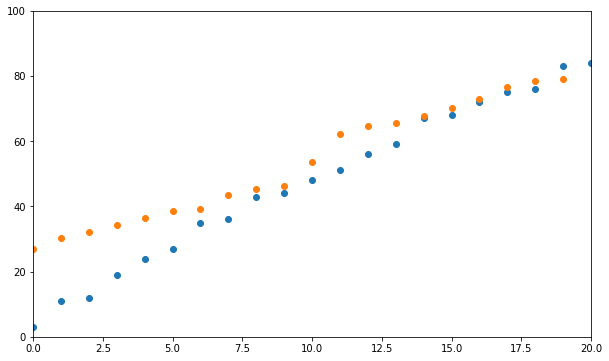

In [53]:
x1 = np.arange(0, len(trial_pnts), 1)
x2 = np.arange(0, len(df_copnofilt), 1)


fig, ax = plt.subplots(1, 1, figsize = (10,6))
ax.scatter(x1, sorted(trial_pnts))
ax.scatter(x2, sorted(20*df_copnofilt['Factor']))

ax.set_xlim(0,20)
ax.set_ylim(0,100)

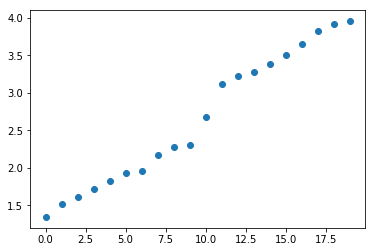

In [27]:
x = np.arange(0, len(df_copnofilt), 1)
plt.scatter(x, sorted(df_copnofilt['Factor']))

In [24]:
df_copnofilt

,Ring,Ring Type,Angle,Factor
0,0.076,F,0.662021,1.511484
1,0.082,F,0.714286,1.716508
2,0.085,F,0.740418,1.820322
3,0.089,F,0.775261,1.959455
4,0.095,F,0.827526,2.168313
5,0.099,F,0.862369,2.306670
6,0.130,F,1.132404,3.279253
7,0.139,F,1.210801,3.503625
8,0.146,F,1.271777,3.652883
9,0.156,F,1.358885,3.823047
